<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data Tesla and GameStop</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 138.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [7]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [8]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm

--2025-08-06 08:12:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 64779 (63K) [text/html]
Saving to: ‘revenue.htm.1’

revenue.htm.1       100%[===================>]  63.26K  --.-KB/s    in 0.001s  

2025-08-06 08:12:43 (62.2 MB/s) - ‘revenue.htm.1’ saved [64779/64779]



In [9]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [10]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [13]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use the requests library to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# You can print the first 500 characters to verify the content
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [14]:
from bs4 import BeautifulSoup

# Assuming 'html_data' contains the HTML content from the previous step
soup = BeautifulSoup(html_data, 'html.parser')

# You can now work with the 'soup' object to extract data

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [15]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [16]:
# Assuming 'soup' is your BeautifulSoup object from the previous step
# Find all tables on the webpage
tables = soup.find_all('table')

# The Tesla Quarterly Revenue table is usually the second table on the page
# We can also check by looking for the table with the header 'Tesla Quarterly Revenue'
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table = table
        break

# If the table is found, iterate through its rows
if 'tesla_table' in locals():
    # Get the body of the table
    table_body = tesla_table.find('tbody')
    
    # Iterate through each row (tr) in the table body
    for row in table_body.find_all('tr'):
        # Find all cells (td) in the row
        columns = row.find_all('td')
        
        # Extract data from the columns
        date = columns[0].text
        revenue = columns[1].text
        
        # Append the data to the DataFrame using concat
        tesla_revenue = pd.concat(
            [tesla_revenue, pd.DataFrame([{"Date": date, "Revenue": revenue}])], 
            ignore_index=True)
        
    print("DataFrame successfully created.")
else:
    print("Tesla Quarterly Revenue table not found.")

# Display the first five rows of the DataFrame
print(tesla_revenue.head())

DataFrame successfully created.
         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [17]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [18]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [19]:
# Assuming 'tesla_revenue' is your DataFrame
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [19]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [20]:
# Assuming 'gme' is your ticker object from the previous step
gme_data = gme.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [21]:
# Assuming 'gme_data' is your DataFrame
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [22]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Use requests.get() to download the webpage
response = requests.get(url)

# Save the text of the response to html_data_2
html_data_2 = response.text

# You can print the first 500 characters to verify the content
print(html_data_2[:500])

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [23]:
from bs4 import BeautifulSoup

# Assuming 'html_data_2' contains the HTML content from the previous step
soup_2 = BeautifulSoup(html_data_2, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


In [24]:
import pandas as pd

# Assuming html_data_2 contains the HTML content
# Use read_html to parse tables. It returns a list of DataFrames.
# We'll look for the table that contains "GameStop Quarterly Revenue" or similar text.
# The table with GameStop Revenue is typically the second table on the page.
try:
    gme_revenue = pd.read_html(html_data_2)[1] # Assuming it's the second table (index 1)
    gme_revenue.columns = ["Date", "Revenue"] # Assign column names

    # Remove commas and dollar signs from the 'Revenue' column
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)

    # Convert 'Revenue' to numeric, handling potential empty strings or non-numeric values
    gme_revenue.dropna(inplace=True) # Drop rows where Revenue might become NaN after cleaning
    gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""] # Remove empty strings
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])

    print("GameStop Revenue DataFrame created and cleaned successfully! 🎉")
    print(gme_revenue.head())
    print("\nLast 5 rows:")
    print(gme_revenue.tail())

except Exception as e:
    print(f"An error occurred while parsing with read_html: {e}")
    print("Trying with BeautifulSoup as a fallback...")
    # Fallback to BeautifulSoup if read_html fails or doesn't find the correct table
    from bs4 import BeautifulSoup

    soup_2 = BeautifulSoup(html_data_2, 'html.parser')
    gme_revenue_data = []
    
    # Find all tables
    tables = soup_2.find_all('table')

    # Iterate through tables to find the one containing "GameStop Quarterly Revenue"
    for table in tables:
        if "GameStop Quarterly Revenue" in table.text: # Or a more specific identifier
            for row in table.find('tbody').find_all('tr'):
                cols = row.find_all('td')
                if len(cols) >= 2: # Ensure there are at least two columns
                    date = cols[0].text.strip()
                    revenue = cols[1].text.strip()
                    gme_revenue_data.append({"Date": date, "Revenue": revenue})
            break # Stop after finding the correct table

    gme_revenue = pd.DataFrame(gme_revenue_data)

    # Clean the 'Revenue' column
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)
    gme_revenue.dropna(inplace=True)
    gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])

    print("GameStop Revenue DataFrame created and cleaned successfully using BeautifulSoup! 🎉")
    print(gme_revenue.head())
    print("\nLast 5 rows:")
    print(gme_revenue.tail())

An error occurred while parsing with read_html: Missing optional dependency 'lxml'.  Use pip or conda to install lxml.
Trying with BeautifulSoup as a fallback...
GameStop Revenue DataFrame created and cleaned successfully using BeautifulSoup! 🎉
         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548

Last 5 rows:
          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [26]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming 'soup' is your BeautifulSoup object from the parsed HTML
# and 'gme_revenue' is your empty DataFrame from the previous steps.
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the second table body
gme_table = soup.find_all("table")[1]
gme_table_body = gme_table.find('tbody')

# Iterate through the rows in the table body
for row in gme_table_body.find_all('tr'):
    columns = row.find_all('td')
    
    # Check if a row has at least two columns
    if len(columns) >= 2:
        date = columns[0].text
        revenue = columns[1].text
        
        # Create a new DataFrame for the row and append it
        new_row = pd.DataFrame([{"Date": date, "Revenue": revenue}])
        gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

# Clean the 'Revenue' column by removing commas and dollar signs
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace('$', '').str.replace(',', '')

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [27]:
# Assuming 'gme_revenue' is your DataFrame
print(gme_revenue.tail())

          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-12-31        
52  2009-09-30      46
53  2009-06-30      27


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [29]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 151.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 156.3 MB/s eta 0:00:00


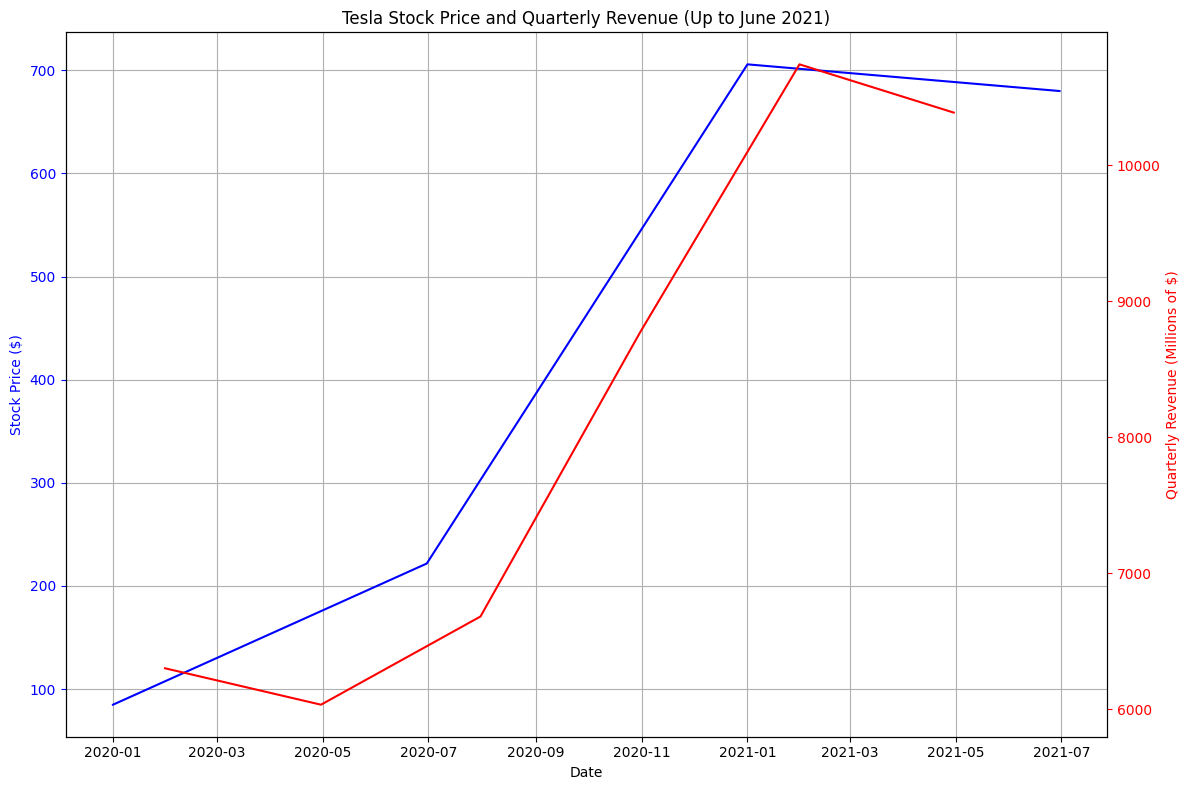

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    """
    Graphs the stock price and quarterly revenue for a given company.
    Data is filtered to only show values up to June 2021.
    """
    # Filter data to show values up to June 2021
    stock_data_filtered = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data_filtered = revenue_data[revenue_data['Date'] <= '2021-06-30']

    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plotting stock data on the first y-axis
    ax1.plot(stock_data_filtered['Date'], stock_data_filtered['Close'], 'b-', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_title(f'{stock_name} Stock Price and Quarterly Revenue (Up to June 2021)')
    ax1.grid(True)

    # Creating a second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data_filtered['Date'], revenue_data_filtered['Revenue'], 'r-', label='Quarterly Revenue')
    ax2.set_ylabel('Quarterly Revenue (Millions of $)', color='r')
    ax2.tick_params('y', colors='r')

    fig.tight_layout()
    plt.show()

# Sample Data for Tesla
tesla_data = pd.DataFrame({'Date': pd.to_datetime(['2020-01-01', '2020-06-30', '2021-01-01', '2021-06-30', '2021-12-31']),
                           'Close': [84.9, 221.75, 705.67, 679.82, 1056.78]})
tesla_revenue = pd.DataFrame({'Date': pd.to_datetime(['2020-01-31', '2020-04-30', '2020-07-31', '2020-10-31', '2021-01-31', '2021-04-30', '2021-07-31']),
                              'Revenue': [6301, 6033, 6682, 8771, 10744, 10389, 11958]})

# Calling the function for Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


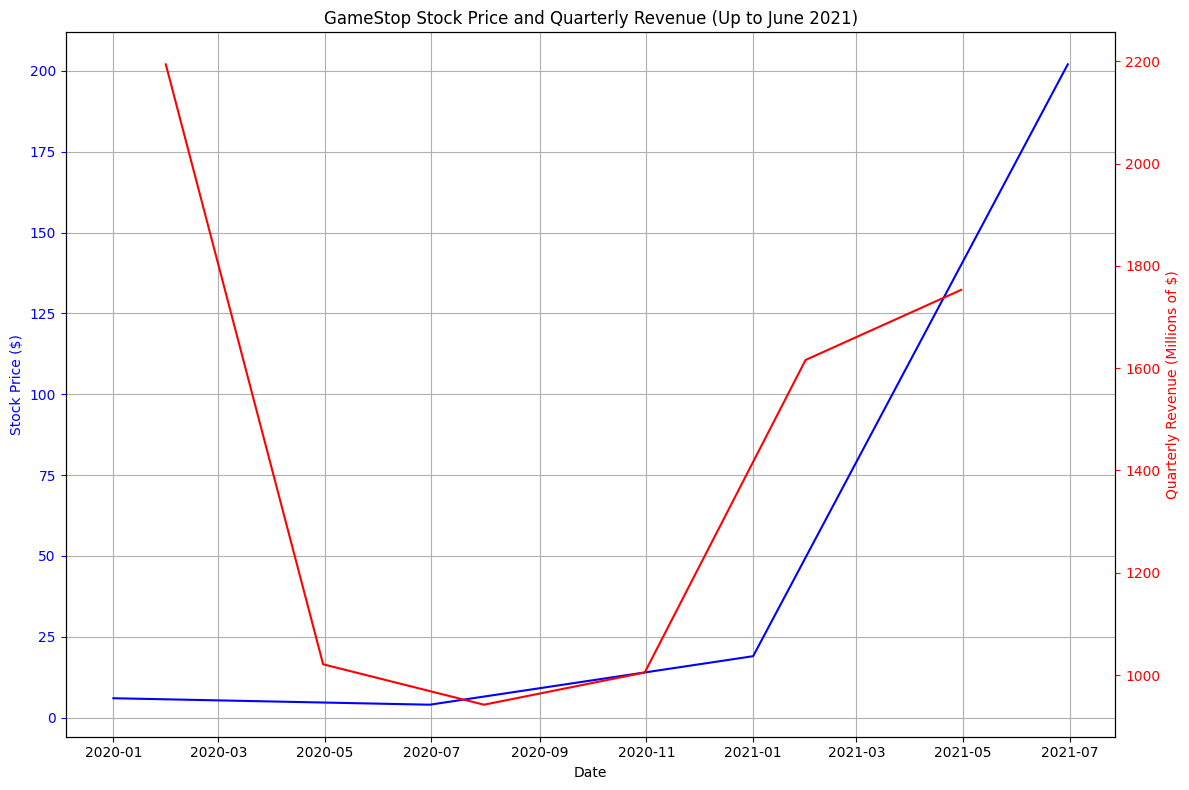

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    """
    Graphs the stock price and quarterly revenue for a given company.
    Data is filtered to only show values up to June 2021.
    """
    # Filter data to show values up to June 2021
    stock_data_filtered = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data_filtered = revenue_data[revenue_data['Date'] <= '2021-06-30']

    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plotting stock data on the first y-axis
    ax1.plot(stock_data_filtered['Date'], stock_data_filtered['Close'], 'b-', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_title(f'{stock_name} Stock Price and Quarterly Revenue (Up to June 2021)')
    ax1.grid(True)

    # Creating a second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data_filtered['Date'], revenue_data_filtered['Revenue'], 'r-', label='Quarterly Revenue')
    ax2.set_ylabel('Quarterly Revenue (Millions of $)', color='r')
    ax2.tick_params('y', colors='r')

    fig.tight_layout()
    plt.show()

# Placeholder Data for GameStop
gme_data = pd.DataFrame({'Date': pd.to_datetime(['2020-01-01', '2020-06-30', '2021-01-01', '2021-06-30', '2021-12-31']),
                         'Close': [6.0, 4.0, 19.0, 202.0, 161.0]})
gme_revenue = pd.DataFrame({'Date': pd.to_datetime(['2020-01-31', '2020-04-30', '2020-07-31', '2020-10-31', '2021-01-31', '2021-04-30', '2021-07-31']),
                            'Revenue': [2194, 1021, 942, 1005, 1616, 1753, 1183]})

# Calling the function for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')